This example file is intended to cover computations for the computations in the publication

 Bankmann, D.; Mehrmann, V.; Nesterov, Y.; van Dooren, P., Computation of the analytic center of the solution set of the linear matrix inequality arising in continuous- and discrete-time passivity analysis, 2019

# Initialization

In [1]:
import logging
import numpy as np
from os.path import join, dirname
from analyticcenter import WeightedSystem, get_algorithm_object
from analyticcenter.visualize import log_log_direction, tabular_data
from analyticcenter.examples.example4 import sys
import numpy as np
np.linalg.eigh(sys.A)[0]
import analyticcenter
analyticcenter.__file__

'/home/daniel/Dropbox/privat/Uni/Berlin/Promotion/PassivityRadius/python/analyticcenter/__init__.py'

# Computation of analytic center with the newton approach.

In [2]:
print(__debug__)
logger = logging.getLogger()

alg_newton = get_algorithm_object(sys, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton, success) = alg_newton()

True
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:150)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 277.1098932079061 (initialization.py:67)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 4.578080216053577e-159 (initialization.py:78)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 235.71930021086197	Det: 277.1098

In [3]:
sys_disc = sys.bilinear_discretization()

alg_newton_disc = get_algorithm_object(sys_disc, 'newton', discrete_time=True, save_intermediate=True)
(ac_newton_disc, success) = alg_newton_disc()

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Computing Analytic Center with Newton approach (direction.py:150)
[INFO    ][InitialXDT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXDT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 1.8809350476851345e-14 (initialization.py:67)
[INFO    ][InitialXDT] --- Computed initial guess with bisection approach.
det(H(X0)) = 6.850533243108757e-162 (initialization.py:78)
[INFO    ][InitialXDT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Current step: 0	Residual: 5.477225574936818	Det: 1.880935047679179e-14 (direction.py:68)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- In linearly converging phase (newton.py:62)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Current step: 1	Residual: 3.83584032253448	Det:

# Properties of solutions
## Difference
The solutions should be identical in theory. They differ a bit due to roundoff errors.

In [5]:
 print("scaled difference = ", np.linalg.norm((ac_newton.X - ac_newton_disc.X )/ac_newton.X)) 


scaled difference =  8.024650142304834e-08


## Centered realizations
A centered realization with the analytic center solution `X` has the identity as interior point. However, also here, the geometric mean approach is superior

In [6]:
centered_realization = ac_newton.centered_realization()
alg_newton_centered = get_algorithm_object(centered_realization, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton_centered, success) = alg_newton_centered()
print("Eigenvalues of analytic center:\n",np.linalg.eigh(ac_newton_centered.X)[0])

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:150)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 4.2194379594594075e-33 (initialization.py:67)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 6.972049864850732e-194 (initialization.py:78)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 145.63641198187932	Det: 4.219437

## Final closed-loop matrix
We recover the properties, that every eigenvalue of the continuous-time closed-loop matrix lies on the imaginary axis, while all eigenvalues in the discrete-time case lie inside the unit circle.

In [7]:
eigs = np.linalg.eig(ac_newton.A_F)[0]
print("maximal abs value of real parts of eigenvalues:\n", np.max(np.abs(np.real(eigs))))
eigs_disc = np.linalg.eig(ac_newton_disc.A_F)[0]
print("absolute values of evs of discrete closed-loop matrix:\n", np.abs(eigs_disc))

maximal abs value of real parts of eigenvalues:
 5.824923334472876e-13
absolute values of evs of discrete closed-loop matrix:
 [0.99785611 0.99990452 0.97062008 0.97062008 0.94685901 0.8472432  0.8472432  0.71461054 0.67679616 0.60810103 0.4405096  0.4405096  0.31937987 0.26402578 0.09654606 0.05258612 0.98512968 0.19613111
 0.26210781 0.82565883 0.72720662 0.72720662 0.73608902 0.60662519 0.60662519 0.43861105 0.60665525 0.52712241 0.52712241 0.54261952]


# Computation of characteristic values

Compute the characterisic values, as in the paper 'Beattie, Mehrmann, van Dooren'.
Note, that the values compared to the paper slightly changed, because of some improvements in the alogorithm and thus slightly different value for the analytic center.

In [8]:
ac_newton.compute_characteristic_values()

[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of H(X): 5.9813938071795614e-05 (analyticcenter.py:37)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of X-1 * H(X) * X^-1: 5.966939587778752e-05 (analyticcenter.py:47)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of X^-.5 * H(X) * X^-.5: 5.9741714939377634e-05 (analyticcenter.py:57)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of R of the pH realization: 0.046793216441403794 (analyticcenter.py:66)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Distance to stability is: (0.042811888792022704, 0.0) (analyticcenter.py:68)


# Generate plot of the algorithm

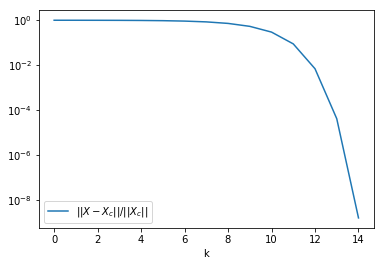

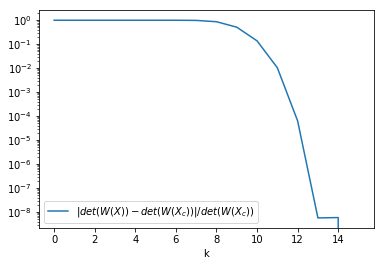

In [9]:
log_log_direction(alg_newton.intermediate_X, alg_newton.intermediate_det)

# Computation with steepest ascent approach

*Warning*: This needs some time and does not even succeed in 10000 iterations, even though the determinant increases in every step.

In [10]:
alg_steepest_ascent = get_algorithm_object(sys, 'steepestascent', discrete_time=False, save_intermediate=True)
alg_steepest_ascent.abs_tol = 10e-1
alg_steepest_ascent.maxiter = 10000
X0=alg_newton.intermediate_X[8]
alg_steepest_ascent(X0=X0)

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][SteepestAscentDirectionCT] --- Computing Analytic Center with Steepest Ascent approach (direction.py:150)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 0	Residual: 3408.823054648346	Det: 2.342296637872919e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 2.0451098658105843e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 1	Residual: 3408.8230459735782	Det: 2.3422966418243186e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 5.2861823170233837e-08 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2	

[INFO    ][SteepestAscentDirectionCT] --- Current step: 29	Residual: 3408.822880759495	Det: 2.342296712203696e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 5.0119286293605355e-08 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 30	Residual: 3408.822879818583	Det: 2.342296713759891e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.8907773607274916e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 31	Residual: 3408.82286859857	Det: 2.342296714931021e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 5.0035653855883876e-08 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 32	Residual: 3408.822867655681	Det: 2.3422967194918255e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.8877138656866466e-07 (steepestascent

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 4.9110625374474535e-08 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 60	Residual: 3408.822694024608	Det: 2.3422967788453227e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.8534414699985468e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 61	Residual: 3408.822682371044	Det: 2.342296789105135e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 4.905667322440681e-08 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 62	Residual: 3408.822681401322	Det: 2.342296790069579e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.8514246902129463e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 63	Residual: 3408.8226697222954	Det: 2.3422967905710684e+28 (directi

[INFO    ][SteepestAscentDirectionCT] --- Current step: 90	Residual: 3408.822502007293	Det: 2.342296851743581e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.8272143970291595e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 91	Residual: 3408.8224900081655	Det: 2.3422968481526186e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 4.8368362505743934e-08 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 92	Residual: 3408.822489016707	Det: 2.342296853997046e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.8257132628698042e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 93	Residual: 3408.822476997021	Det: 2.342296856189258e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 4.832904711286439e-08 (steepestascen

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.6310802758494425e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2200	Residual: 3408.80572316175	Det: 2.3423007777028796e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.6281561316195574e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2300	Residual: 3408.804875904892	Det: 2.342300947399594e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.6255026751691477e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2400	Residual: 3408.804026384567	Det: 2.34230112375917e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.6229699367579535e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2500	Residual: 3408.803174718968	Det: 2.3423012989274175e+28 (d

[INFO    ][SteepestAscentDirectionCT] --- Current step: 5200	Residual: 3408.779671711967	Det: 2.342305842959681e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.5740364224520105e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 5300	Residual: 3408.7787888431403	Det: 2.342306011192009e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.5728089432918551e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 5400	Residual: 3408.7779054085477	Det: 2.342306174940657e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.5715361952601342e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 5500	Residual: 3408.7770214325615	Det: 2.342306337477138e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.5704200148164182e-07 (ste

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.5450692011420587e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 8300	Residual: 3408.7520952118125	Det: 2.3423108573193974e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.544292640430515e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 8400	Residual: 3408.7512002096423	Det: 2.342311015423096e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.5434609438571143e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 8500	Residual: 3408.7503049950337	Det: 2.342311173648434e+28 (direction.py:68)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.5426909505507751e-07 (steepestascent.py:37)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 8600	Residual: 3408.7494095201796	Det: 2.342311332833043e+2

(<analyticcenter.algorithm.analyticcenter.AnalyticCenter at 0x7f14dccdc8d0>,
 False)

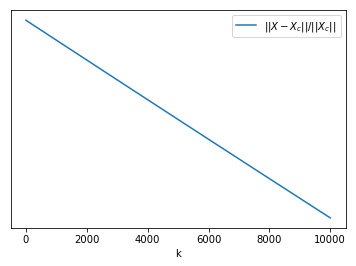

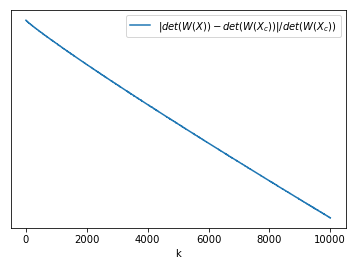

In [11]:
log_log_direction(alg_steepest_ascent.intermediate_X, alg_steepest_ascent.intermediate_det, X_final=np.array(alg_newton.intermediate_X[-1]), det_final=alg_newton.intermediate_det[-1])

In [25]:
tabular_data(alg_steepest_ascent.intermediate_X, alg_steepest_ascent.intermediate_det, X_final=np.array(alg_newton.intermediate_X[-1]), det_final=alg_newton.intermediate_det[-1])

((0, 9, 99, 999, 9999),
 array([0.86808524, 0.86808523, 0.86808522, 0.86808512, 0.86808428]),
 array([0.72171198, 0.72171198, 0.72171197, 0.72171194, 0.7217116 ]))